## Final Project Submission

Please fill out:
* Student name: Phil Conrad Kirundi
* Student pace: Full Time Hybrid
* Scheduled project review date/time: N/A
* Instructor name: Mr. Antonny Muiko



## Naviar Corporation Aircraft Project Analysis

![Company Logo](<images/Screenshot (277).png>)

## Overview

Naviar Corporation is a company that rents and sells luxury  vehicles and offers chauffeuring services. However, the company has decided to venture into the aircraft industry where it would be purchasing and operating airplanes for commercial and private enterprises.

In this project, the public dataset from the National Transportation Safety Board will be used to determine the aircrafts that have the least amount of risks.

## Business Understanding

![Private Jet](images/private_jet_services_group_inc__cover.jpeg)

Naviar Corporation requires a risk-free set of commercial and private aircraft in order to avoid casualties and financial losses which might damage the business. I am responsible for analyzing data/findings and developing insights and recommendations that will help the head of the new aviation division decide which aircraft to purchase. 

## Data Understanding

The aviation accident data (1962-2023) from the National Transportation Safety Board highlights the civil aviation accidents and selected incidents in the United States and international waters. In this case, there would be statistics about the plane descriptions, type of accidents and the number of fatalities/injuries sustained during the accident.

The Event ID is the unique identifier.
I need to get the description of the dataset in order to know the data structure and data types in order to clean the data.

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [376]:
df = pd.read_csv('./data/Aviation_Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_9360\222585957.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Aviation_Data.csv')


There seems to be a lot of null values in many of the columns.
We then have to figure out the outlook of the 1st 10 rows and the last 10 rows.

In [377]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [378]:
df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90338,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90339,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
90340,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
90341,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
90342,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


## Data Preparation

### Data Cleaning

I will normalize the column names for easier clarity.

In [379]:
df.columns = df.columns.str.lower().str.replace('.', '_')

df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Checking number of missing values in each column

In [380]:
df.isna().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
latitude                  55966
longitude                 55975
airport_code              40216
airport_name              37644
injury_severity            2459
aircraft_damage            4653
aircraft_category         58061
registration_number        2841
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8555
far_description           58325
schedule                  77766
purpose_of_flight          7651
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7843
publication_date          16689
dtype: i

I need to delete rows based on NaN values. In this case, the `accident_number` column should not have any missing values because it is a unique identifier.

In [381]:
df.dropna(subset=['accident_number'], inplace=True)
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [382]:
df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          15230
dtype: i

In [383]:
df['aircraft_category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [384]:
df['make'].nunique()

8237

We also need to get rid of rows with NaN values in the model column because the make and the model are important attributes.

In [385]:
df.dropna(subset=['model'], inplace=True)

We also need to get rid of the duplicates especially for the make/model columns. So, we need to combine both columns and change the case to uppercase.

In [386]:
df['make/model'] = (df['make'] + ' ' + df['model']).str.upper()
df['make/model']

0                           STINSON 108-3
1                          PIPER PA24-180
2                             CESSNA 172M
3                            ROCKWELL 112
4                              CESSNA 501
                       ...               
90343                     PIPER PA-28-151
90344                       BELLANCA 7ECA
90345    AMERICAN CHAMPION AIRCRAFT 8GCBC
90346                         CESSNA 210N
90347                     PIPER PA-24-260
Name: make/model, Length: 88797, dtype: object

In [387]:
df.drop_duplicates()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,make/model
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,STINSON 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,PIPER PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,CESSNA 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,ROCKWELL 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,CESSNA 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,PIPER PA-28-151
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BELLANCA 7ECA
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AMERICAN CHAMPION AIRCRAFT 8GCBC
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CESSNA 210N


Save the cleaned dataframe as csv file for later use

In [388]:
df.to_csv('aviation_data3.csv', index=False, encoding='utf-8', na_rep='NA')

## Data Visualization

We first have to see which make/model has the highest number of total uninjured cases.

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_9360\3334349586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['total_uninjured'] = mini_df['total_uninjured'].fillna(0)


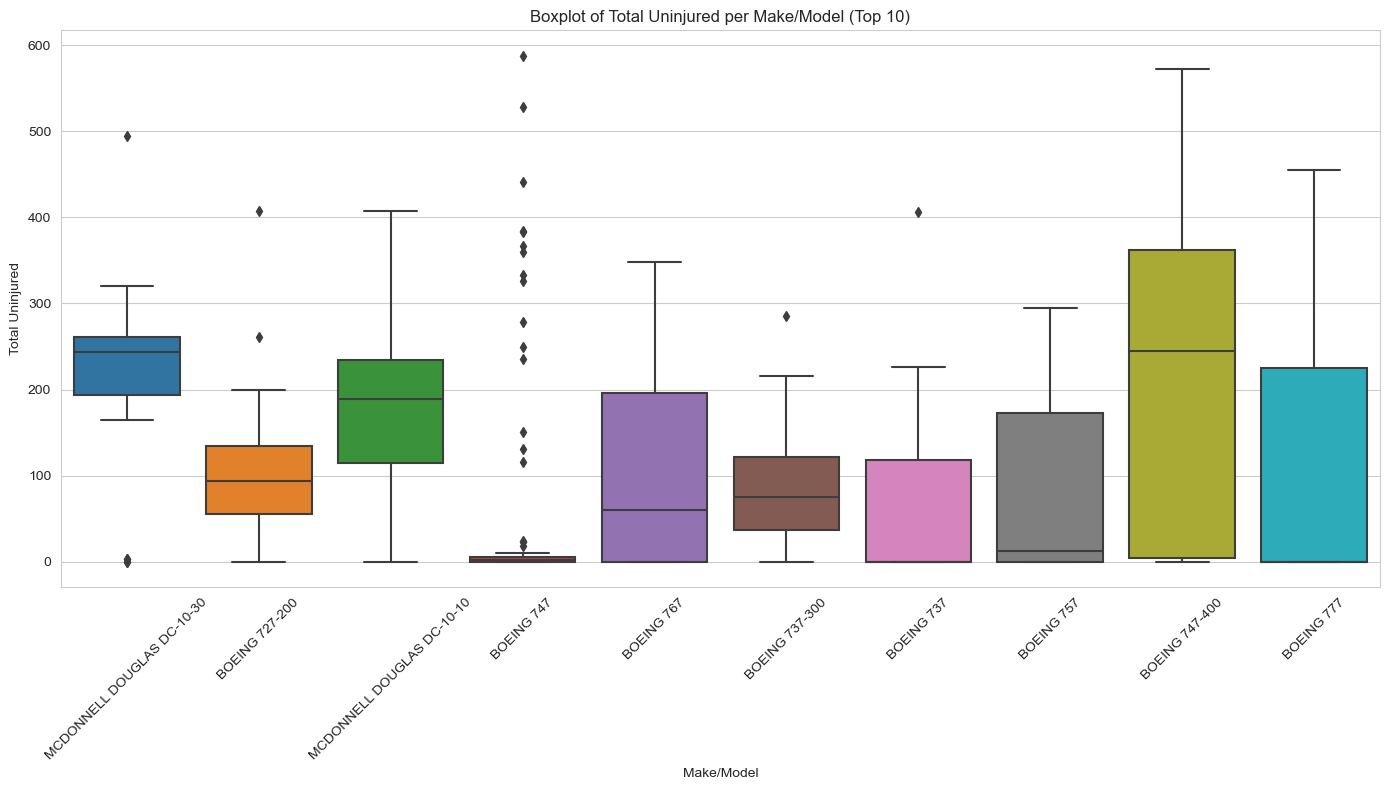

In [389]:
relevant_columns = ['make/model', 'total_uninjured']
mini_df = df[relevant_columns]

# Replace NaN values with 0 for total_uninjured
mini_df['total_uninjured'] = mini_df['total_uninjured'].fillna(0)

# Group by Make/Model and sum the total uninjured counts
agg_df = mini_df.groupby('make/model')['total_uninjured'].sum().reset_index()

# Sort the DataFrame by total_uninjured in descending order and choose the top 10
top_10_makes = agg_df.sort_values(by='total_uninjured', ascending=False).head(10)

# Filter the original dataset to include only the top 10 make/models
top_10_makes_list = top_10_makes['make/model'].tolist()
filtered_df = mini_df[mini_df['make/model'].isin(top_10_makes_list)]

# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Create the boxplot
sns.boxplot(x='make/model', y='total_uninjured', data=filtered_df)

# Set plot labels and title
plt.title('Boxplot of Total Uninjured per Make/Model (Top 10)')
plt.xlabel('Make/Model')
plt.ylabel('Total Uninjured')

plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

We then visualize the number of fatalities according to the phase of flight.

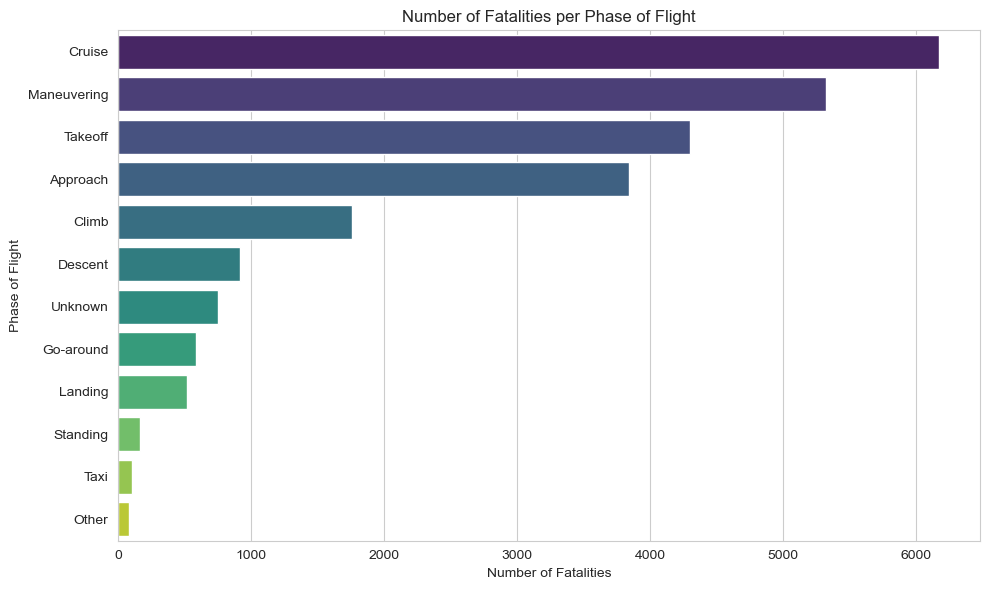

In [390]:
fatalities_by_phase = df.groupby('broad_phase_of_flight')['total_fatal_injuries'].sum().reset_index()

fatalities_by_phase = fatalities_by_phase.sort_values(by='total_fatal_injuries', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='total_fatal_injuries', y='broad_phase_of_flight', data=fatalities_by_phase, palette='viridis')
plt.xlabel('Number of Fatalities')
plt.ylabel('Phase of Flight')
plt.title('Number of Fatalities per Phase of Flight')
plt.tight_layout()
plt.show()

In [391]:
print(fatalities_by_phase)

   broad_phase_of_flight  total_fatal_injuries
2                 Cruise                6171.0
6            Maneuvering                5319.0
9                Takeoff                4302.0
0               Approach                3838.0
1                  Climb                1759.0
3                Descent                 913.0
11               Unknown                 749.0
4              Go-around                 587.0
5                Landing                 518.0
8               Standing                 161.0
10                  Taxi                 102.0
7                  Other                  85.0


We then visualize the total injuries and `total_uninjured` by the purpose of flight. However, there are many NaN values on the `purpose_of_flight` column. So we need to get rid of the rows with NaN values.

In [392]:
df.dropna(subset=['purpose_of_flight'], inplace=True)

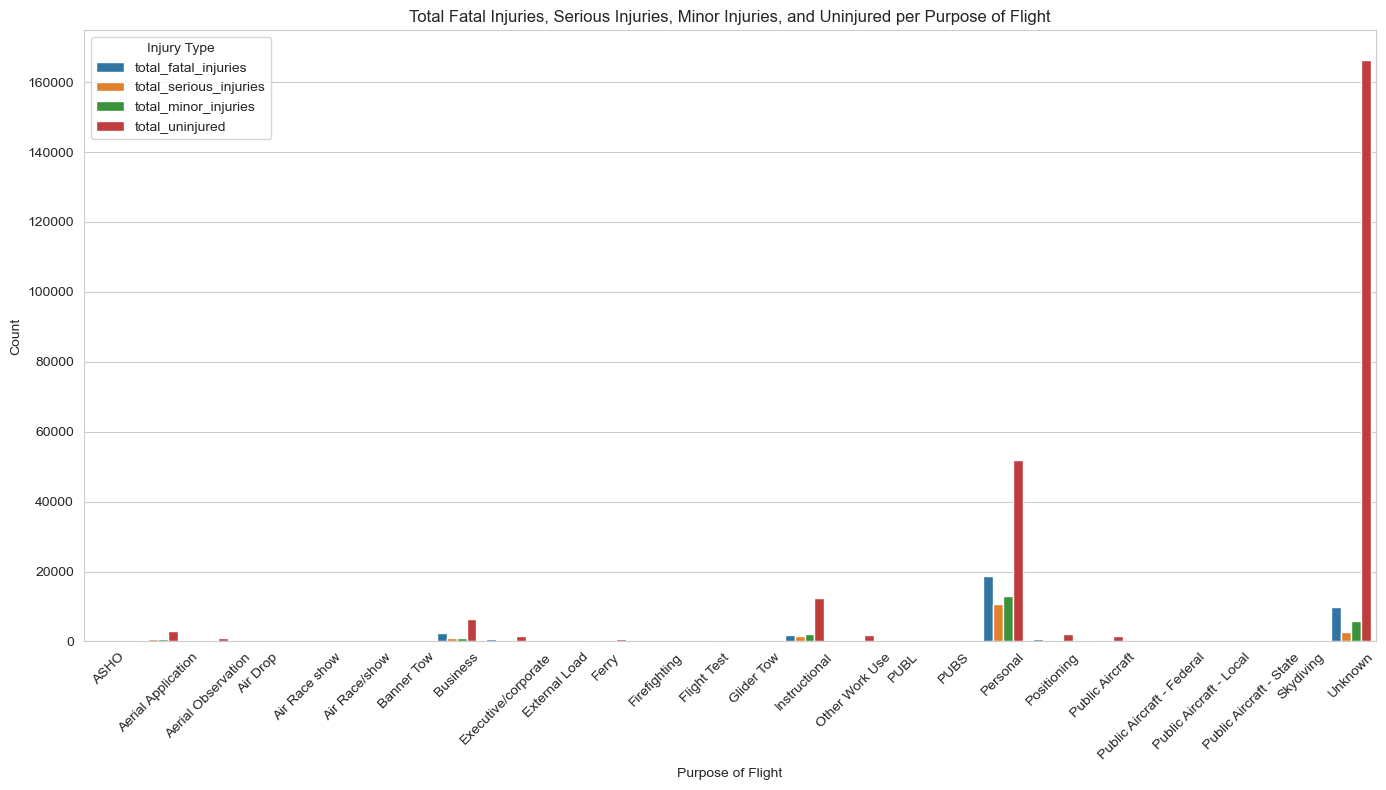

In [393]:
required_columns = ['purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']
min2_df = df[required_columns]

# Replace NaN values with 0 for injury counts
min2_df = min2_df.fillna(0)

# Group by Purpose of Flight and sum the injury counts
agg_df = min2_df.groupby('purpose_of_flight').sum().reset_index()

# Melt the aggregated DataFrame
melted_df = agg_df.melt(id_vars='purpose_of_flight', 
                        value_vars=['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'],
                        var_name='injury_type', 
                        value_name='Count')

# Setting the figure size for the plot
plt.figure(figsize=(14, 8))

# Creating the bar plot
sns.barplot(x='purpose_of_flight', y='Count', hue='injury_type', data=melted_df)

# Setting the title & plot labels
plt.title('Total Fatal Injuries, Serious Injuries, Minor Injuries, and Uninjured per Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')

# Display the plot
plt.tight_layout()
plt.show()

In [394]:
print(melted_df)

             purpose_of_flight           injury_type     Count
0                         ASHO  total_fatal_injuries      14.0
1           Aerial Application  total_fatal_injuries     549.0
2           Aerial Observation  total_fatal_injuries     414.0
3                     Air Drop  total_fatal_injuries      10.0
4                Air Race show  total_fatal_injuries      42.0
..                         ...                   ...       ...
99   Public Aircraft - Federal       total_uninjured     267.0
100    Public Aircraft - Local       total_uninjured      96.0
101    Public Aircraft - State       total_uninjured      65.0
102                  Skydiving       total_uninjured     555.0
103                    Unknown       total_uninjured  166479.0

[104 rows x 3 columns]


In [395]:
df.isna().sum()


event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     42
country                     219
latitude                  51585
longitude                 51595
airport_code              34737
airport_name              32205
injury_severity              51
aircraft_damage            1569
aircraft_category         54841
registration_number         806
make                         17
model                         0
amateur_built                35
number_of_engines          3126
engine_type                3737
far_description           54730
schedule                  73956
purpose_of_flight             0
air_carrier               69195
total_fatal_injuries      10118
total_serious_injuries    11176
total_minor_injuries      10571
total_uninjured            5358
weather_condition          1139
broad_phase_of_flight     22058
report_status              3208
publication_date          14365
make/mod

## Recommendations

1. The BOEING 737 aircraft (airplane category) has the highest number of total_uninjured. That means that in case of an accident, there are more likely to be survivors at the scene. According to the chart, the top 10 aircraft are dominated by the BOEING make, making it the best choice to purchase and operate.
2. Cruise is the most fatal broad phase of flight as it has the most casualties. It is recommended to avoid purchasing aircraft that is associated with cruise as a phase of flight when accidents occur.
3. Personal as a purpose for flight has the highest number of uninjured victims hence the most recommended purpose of flight while operating the aircraft.